## 3. Exploratory Data Analysis

### Import neccessary libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import time
import json
from typing import List, Dict

Read processed dataset and view its shape

In [6]:
# Read the data
processed_df = pd.read_csv('data/processed_data.csv')
processed_df.head()

,appid,name,metacritic,userscore,median_playtime,ccu,price,languages,genre_indie,genre_action,genre_casual,genre_adventure,genre_simulation,genre_rpg,genre_strategy,genre_sports,genre_racing,genre_massively multiplayer
0,570,Dota 2,90,0.815787,6.814543,13.374177,0,28,0,1,0,0,0,0,1,0,0,0
1,440,Team Fortress 2,92,0.885364,5.872118,10.640939,0,27,0,1,0,0,0,0,0,0,0,0
2,271590,Grand Theft Auto V,96,0.870286,8.812843,11.667285,2430,13,0,1,0,1,0,0,0,0,0,0
3,550,Left 4 Dead 2,89,0.975087,6.274762,10.236131,200,28,0,1,0,0,0,0,0,0,0,0
4,252490,Rust,69,0.871065,7.893572,11.794036,3999,25,1,1,0,1,0,1,0,0,0,1


In [7]:
print(f"Number of games in processed_df: {processed_df.shape[0]}")


Number of games in processed_df: 2478


### Data Visualizations

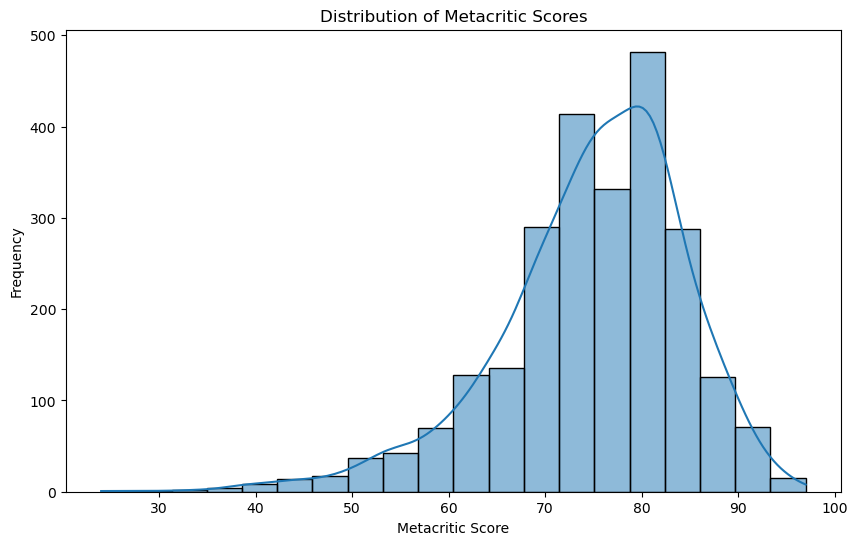

In [8]:
# Histogram of Metacritic scores
plt.figure(figsize=(10, 6))
sns.histplot(processed_df['metacritic'], bins=20, kde=True)
plt.title('Distribution of Metacritic Scores')
plt.xlabel('Metacritic Score')
plt.ylabel('Frequency')
plt.show()

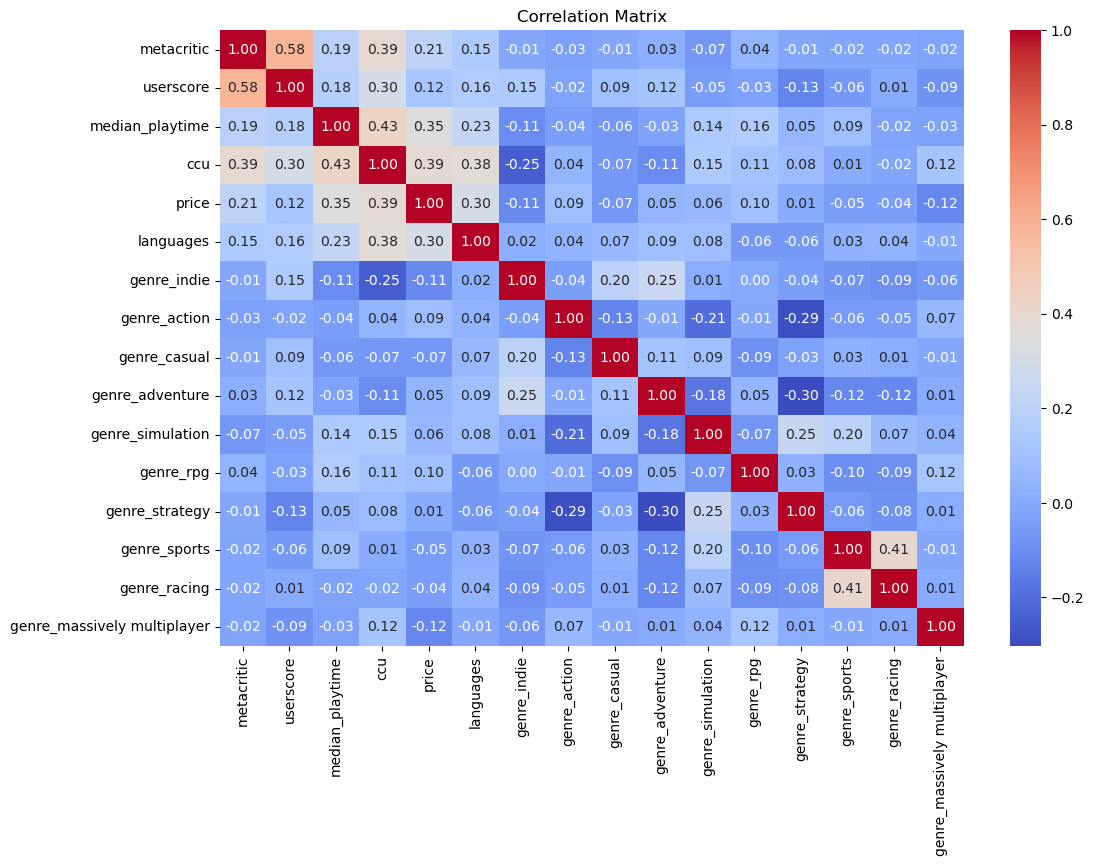

In [9]:
# Compute correlation matrix
corr_matrix = processed_df.drop(columns=['appid', 'name']).corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

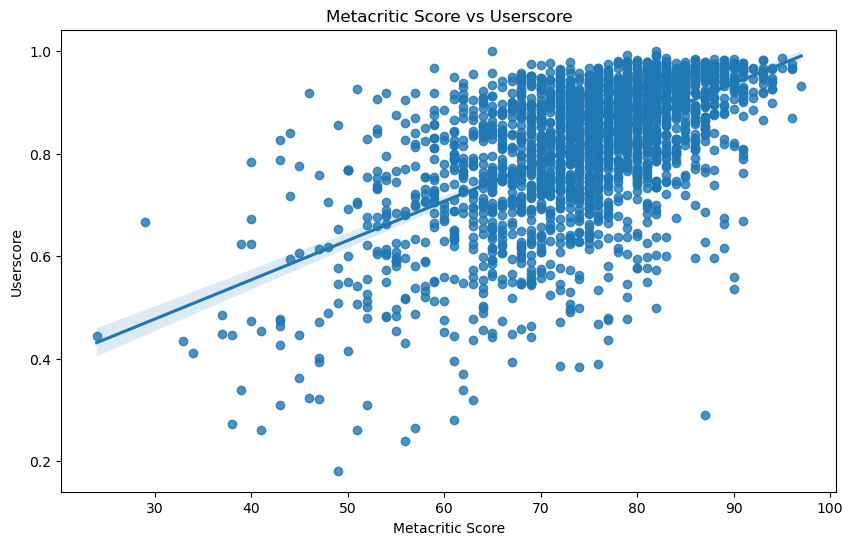

In [10]:
plt.figure(figsize=(10, 6))
sns.regplot(x='metacritic', y='userscore', data=processed_df)
plt.title('Metacritic Score vs Userscore')
plt.xlabel('Metacritic Score')
plt.ylabel('Userscore')
plt.show()

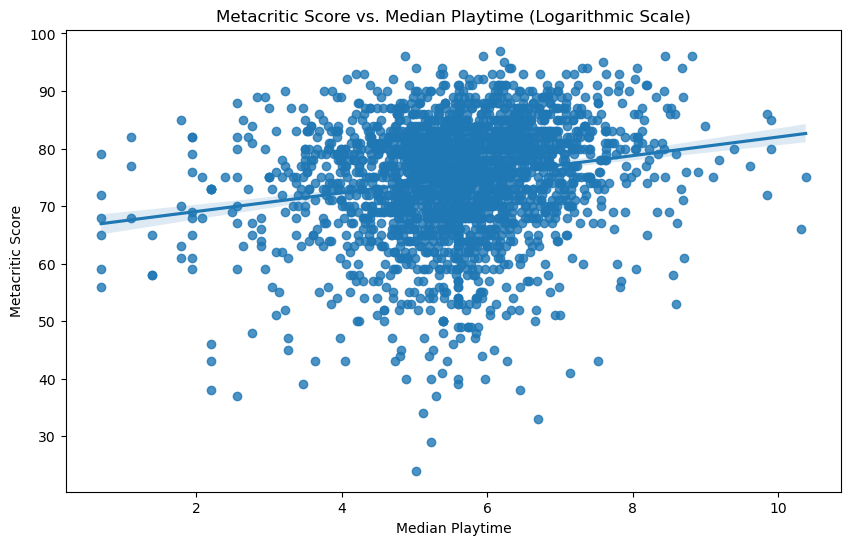

In [11]:
plt.figure(figsize=(10, 6))
sns.regplot(x=processed_df['median_playtime'], y='metacritic', data=processed_df)  # Log transformation
plt.xlabel('Median Playtime')
plt.ylabel('Metacritic Score')
plt.title('Metacritic Score vs. Median Playtime (Logarithmic Scale)')
plt.show()

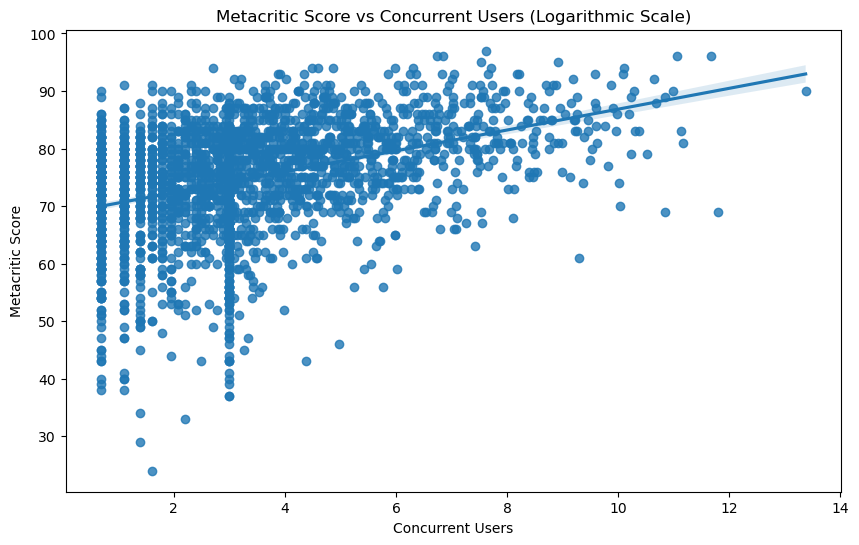

In [12]:
plt.figure(figsize=(10, 6))
sns.regplot(x='ccu', y='metacritic', data=processed_df)
plt.title('Metacritic Score vs Concurrent Users (Logarithmic Scale)')
plt.xlabel('Concurrent Users')
plt.ylabel('Metacritic Score')
plt.show()

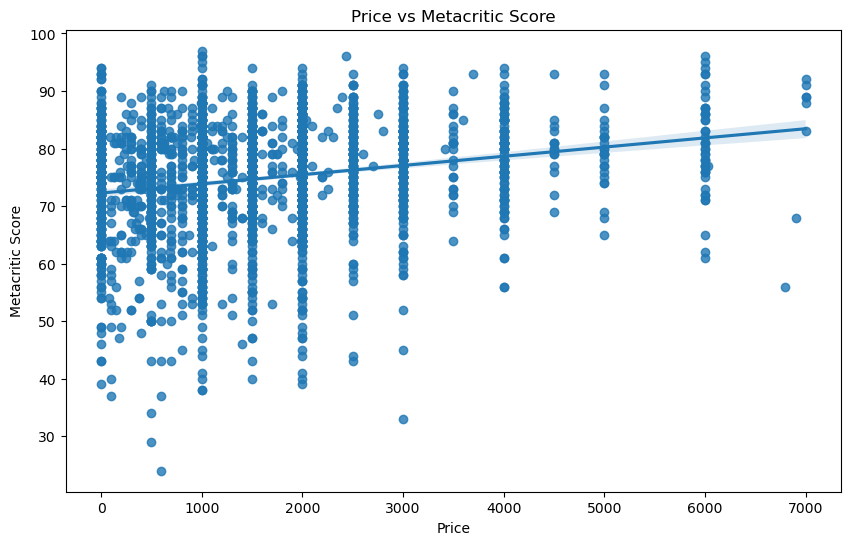

In [13]:
# Scatter plot of Price vs Metacritic Score
plt.figure(figsize=(10, 6))
sns.regplot(x='price', y='metacritic', data=processed_df)
plt.title('Price vs Metacritic Score')
plt.xlabel('Price')
plt.ylabel('Metacritic Score')
plt.show()


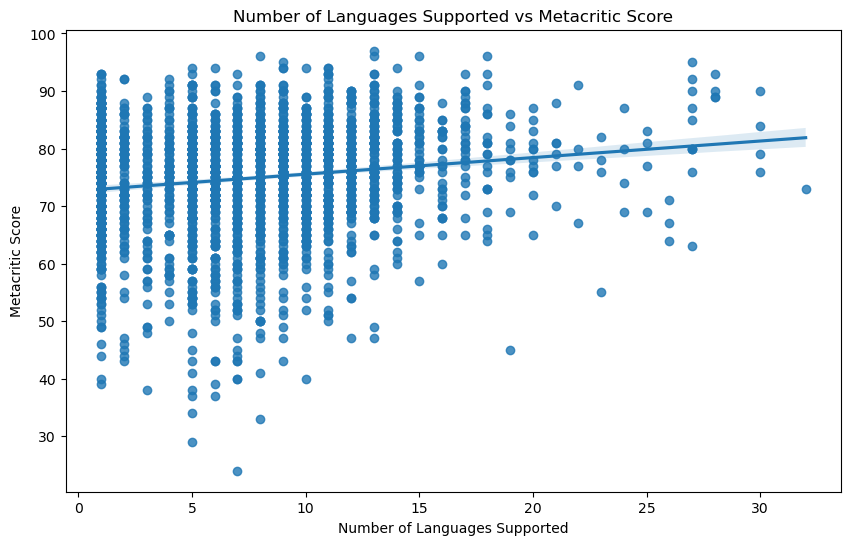

In [14]:
# Number of Languages vs Metacritic Score
plt.figure(figsize=(10, 6))
sns.regplot(x='languages', y='metacritic', data=processed_df)
plt.title('Number of Languages Supported vs Metacritic Score')
plt.xlabel('Number of Languages Supported')
plt.ylabel('Metacritic Score')
plt.show()


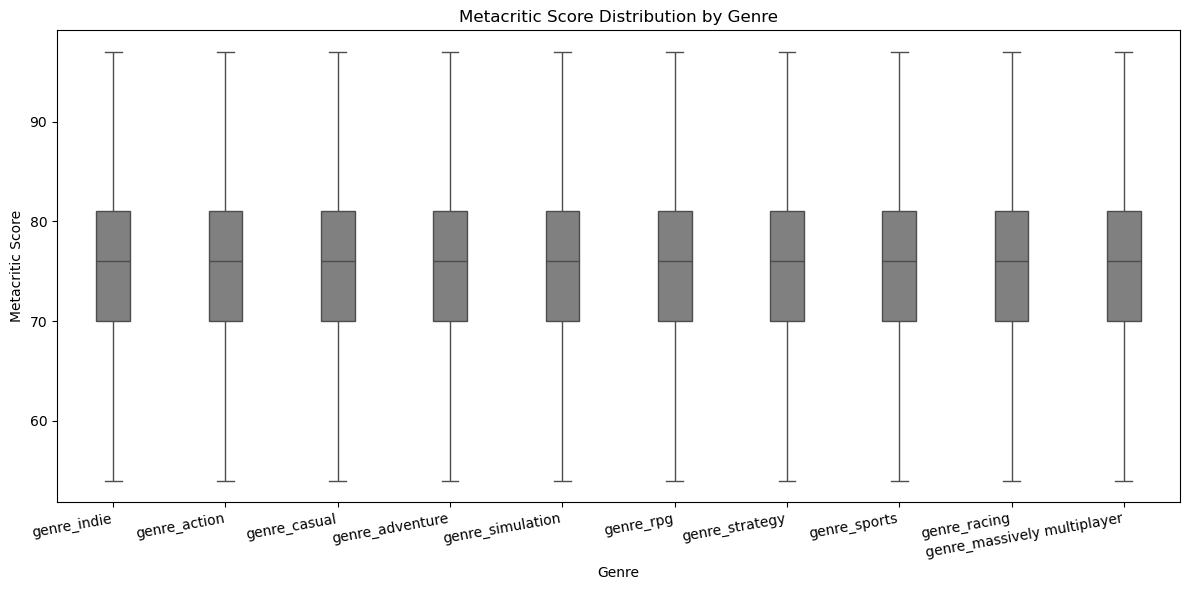

In [16]:
top_genres = ['indie', 'action', 'casual', 'adventure', 'simulation',
              'rpg', 'strategy', 'sports', 'racing', 'massively multiplayer']

plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='metacritic', data=processed_df.melt(id_vars=['metacritic'], 
                                                               value_vars=[f'genre_{genre}' for genre in top_genres],
                                                               var_name='genre', value_name='present'),
            color='gray', showfliers=False, width=0.3) 
plt.xticks(rotation=10, ha='right')
plt.xlabel('Genre')
plt.ylabel('Metacritic Score')
plt.title('Metacritic Score Distribution by Genre')
plt.tight_layout()
plt.show()


### Preliminary Analysis
- Metacritic scores and userscores are the only highly correlated features.
- Metacritic scores see little deviation between top genres.